In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shifaurrahman
Your Kaggle Key: ··········


100%|██████████| 1.47k/1.47k [00:00<00:00, 605kB/s]

In [4]:
data=pd.read_csv('/content/temperature-and-ice-cream-sales/Ice Cream Sales - temperatures.csv')

In [5]:
data.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [6]:
data.shape

(365, 2)

In [7]:
x=data['Temperature']
y=data['Ice Cream Profits']

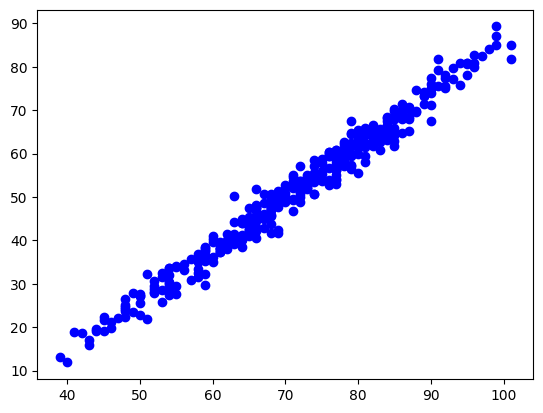

In [8]:
plt.scatter(x,y,c='b')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train.shape,x_test.shape

((292,), (73,))

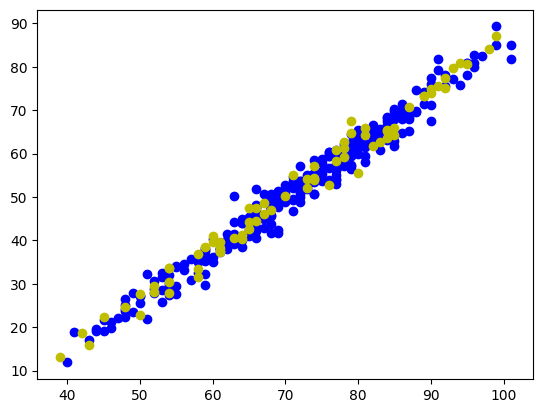

In [11]:
plt.scatter(x_train,y_train,c='b',label='Trainig data')
plt.scatter(x_test,y_test,c='y',label='Testing data')

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

In [13]:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['mae'])

In [14]:
epoch_number=100
history=model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=epoch_number)

Epoch 1/100
10/10 [==============================] - 3s 5ms/step - loss: 24.5703 - mae: 24.5703
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 10.2639 - mae: 10.2639
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 7.3729 - mae: 7.3729
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 6.4503 - mae: 6.4503
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 5.4193 - mae: 5.4193
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 5.7171 - mae: 5.7171
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 5.1128 - mae: 5.1128
Epoch 8/100
10/10 [==============================] - 0s 12ms/step - loss: 5.0894 - mae: 5.0894
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 5.3484 - mae: 5.3484
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 5.2366 - mae: 5.2366
Epoch 11/100
10/10 [==============================] 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
y_predict=model.predict(x_test)

3/3 [==============================] - 0s 5ms/step


In [17]:
y_test.head()

193    53.95
33     29.39
15     24.68
309    65.99
57     31.56
Name: Ice Cream Profits, dtype: float64

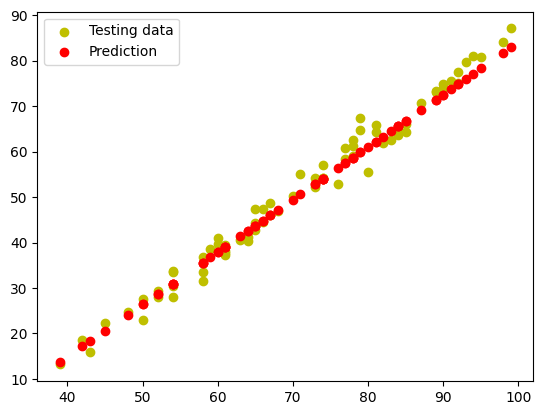

In [18]:
plt.scatter(x_test,y_test,c='y',label='Testing data')
plt.scatter(x_test,y_predict,c='r',label='Prediction')
plt.legend()
plt.show()

In [19]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 1.9738 - mae: 1.9738


[1.9737951755523682, 1.9737951755523682]

In [20]:
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_predict))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.973795>

In [21]:
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predict))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.9925566>

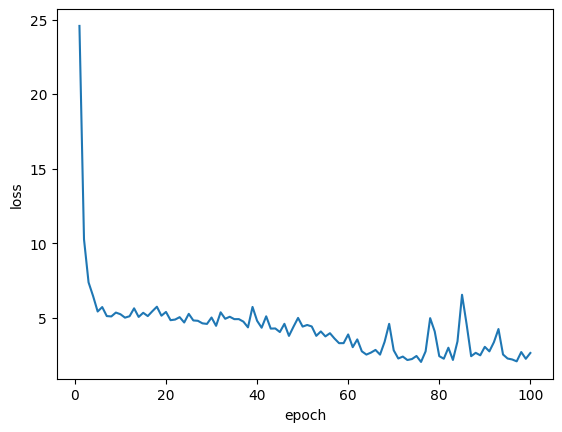

In [22]:
x_range=range(1,epoch_number+1)
loss=history.history['loss']
plt.plot(x_range,loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
input_data = [50]


predicted_expenses = model.predict([input_data])

print("Ice Cream profits:", predicted_expenses[0][0])

1/1 [==============================] - 0s 60ms/step
Ice Cream profits: 26.363745


In [24]:
model.save('new_model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model.save('/content/drive/My Drive/ice cream sales/model.h5')